In [1]:
# import the required packages and the libraries

import PyPDF2
import textract
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import slate3k as slate

In [14]:
# using slate3k read the resume, displaying the truncated data of the resume

with open('Zaineb- resume(2020).pdf', 'rb') as f:
    extracted_data = slate.PDF(f)
extracted_data[1][:900]

'PROJECTS\xa0\n\n1. Web scraping using BeautifulSoup\xa0\n\n-\n\n-\n\nPerformed web scraping on web pages to create a web scraping  engine for job\xa0\nopenings  by extracting data like company name, location, job descriptions,\xa0\netc. and storing the scraped data in a CSV file.\xa0\nTechnologies used:\u200b Python, Pandas, BeautifulSoup\xa0\n\n2. Stock market forecasting using predictive analytics\xa0\n\nImplemented a Machine Learning model which predicts the stock market and\ncrypto currencies prices, given a historical time-series data set.\xa0\xa0\nTechnologies used:\u200b Python, Scikit-Learn,Pandas, Numpy\xa0\nAlgorithm used : \u200bLinear Regression.\xa0\n\n3.\n\nFetching real-time prices of crypto-currencies\xa0\n\nA program to\ncalculate\nand\nconvert\nthe\nreal\ntime prices of BitCoin and\nEthereum  at any given point of time in any required currency format.\xa0\nTechnologies used : \u200bPython, JSON, Coindesk API, Cryptocompare API.\xa0\n\n4. Twitter Sentiment Analysis'

In [4]:
final_text = ''
for text in extracted_data:
    final_text += text

In [15]:
# Convert all strings to lowercase
final_text = final_text.lower()
final_text = final_text.replace(" ","")

# Remove numbers
final_text = re.sub(r'\d+','',final_text)

# Remove punctuation
final_text = final_text.translate(str.maketrans('','',string.punctuation))

In [16]:
# define a master data of the key skills required to score the resume 

terms = {
    "Python": ['python','flask','django','pandas','numpy','scikit-learn','sklearn','matplotlib','scipy','bokeh','statsmodel','keras','seaborn'],
    "Machine Learning": ['linear regression','logistic regression','K means','random forest','svm','naive bayes','decision trees','svd','ensemble methods','predictive analysis','eda'],
    "NLP": ['nlp','natural language processing','chatbot','sentiment analysis','topic modelling','named entity recognition','pos tagging','word embedding','spacy','nltk','bag of words'],
    "Data Engineering": ['aws','amazon redshift','s3','docker','kubernets','scala','teradata','google big query','hive','hadoop','sql','kibana','sqlite3','redis','mongodb','elasticsearch','restful API','web scraping']
}

In [17]:
# Initializie score counters for each area
python = 0
ML = 0
NLP = 0
DE = 0

# Create an empty list where the scores will be stored
scores = []

# Obtain the scores for each area
for area in terms.keys(): 
    if area == 'Python':
        for word in terms[area]:
            if word in final_text:
                python +=1
        scores.append(python)
    elif area == 'Machine Learning':
        for word in terms[area]:
            if word in final_text:
                ML +=1
        scores.append(ML)
    elif area == 'NLP':
        for word in terms[area]:
            if word in final_text:
                NLP +=1
        scores.append(NLP)
    else:
        for word in terms[area]:
            if word in final_text:
                DE +=1
        scores.append(DE)

In [18]:
# Create a data frame with the scores summary
summary = pd.DataFrame(scores,index=terms.keys(),columns=['score']).sort_values(by='score',ascending=False)
summary

,score
Python,8
Data Engineering,7
NLP,3
Machine Learning,1


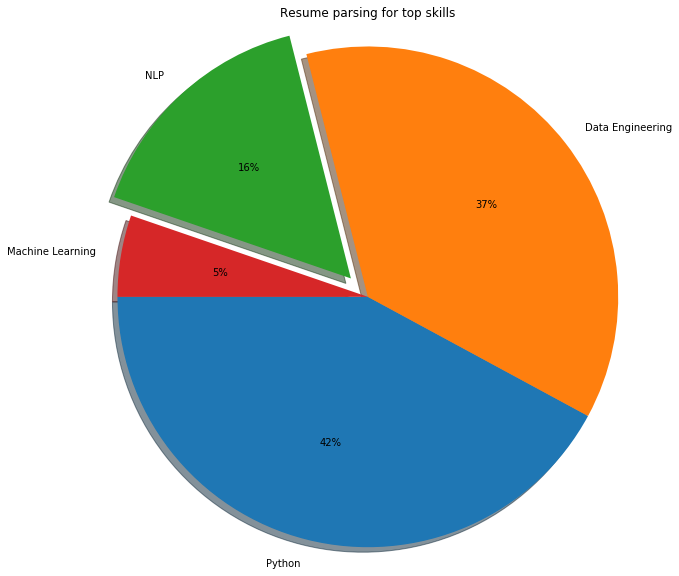

In [19]:
# Create pie chart visualization
pie = plt.figure(figsize=(10,10))
plt.pie(summary['score'], labels=summary.index, explode = (0,0,0.1,0), autopct='%1.0f%%',shadow=True,startangle=180)
plt.title('Resume parsing for top skills')
plt.axis('equal')
plt.show()

# Save pie chart as a .png file
pie.savefig('resume_screening_results.png')